In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [3]:
# plot the data
df = pd.read_csv("AirPassengers.csv",index_col=0, parse_dates=True)

In [4]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


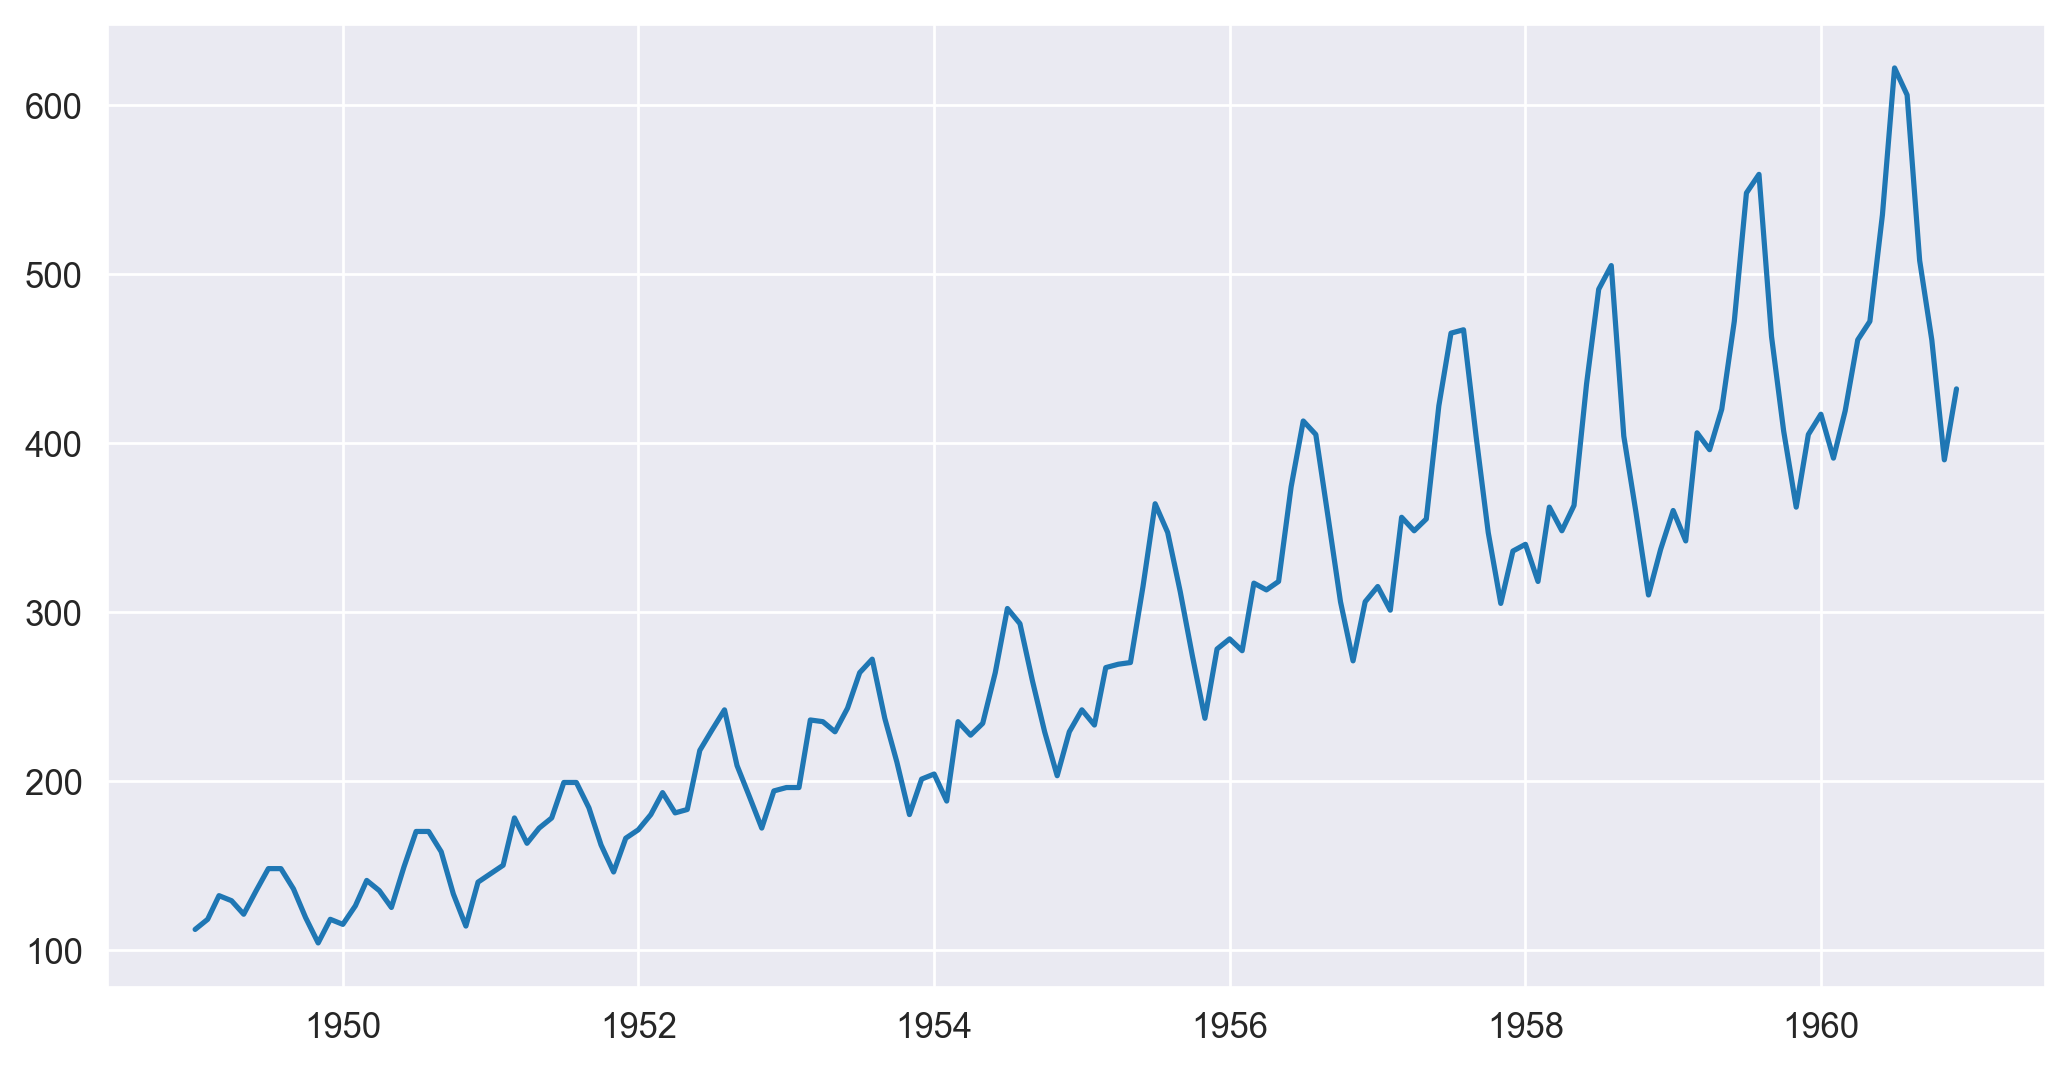

In [6]:
plt.plot(df['Passengers'])

In [7]:
# First-order differnce
df['First-Order'] = df['Passengers'].diff(periods=1)

In [8]:
df

,Passengers,First-Order
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [9]:
# Drop na
df.dropna(inplace=True)

In [10]:
df

,Passengers,First-Order
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


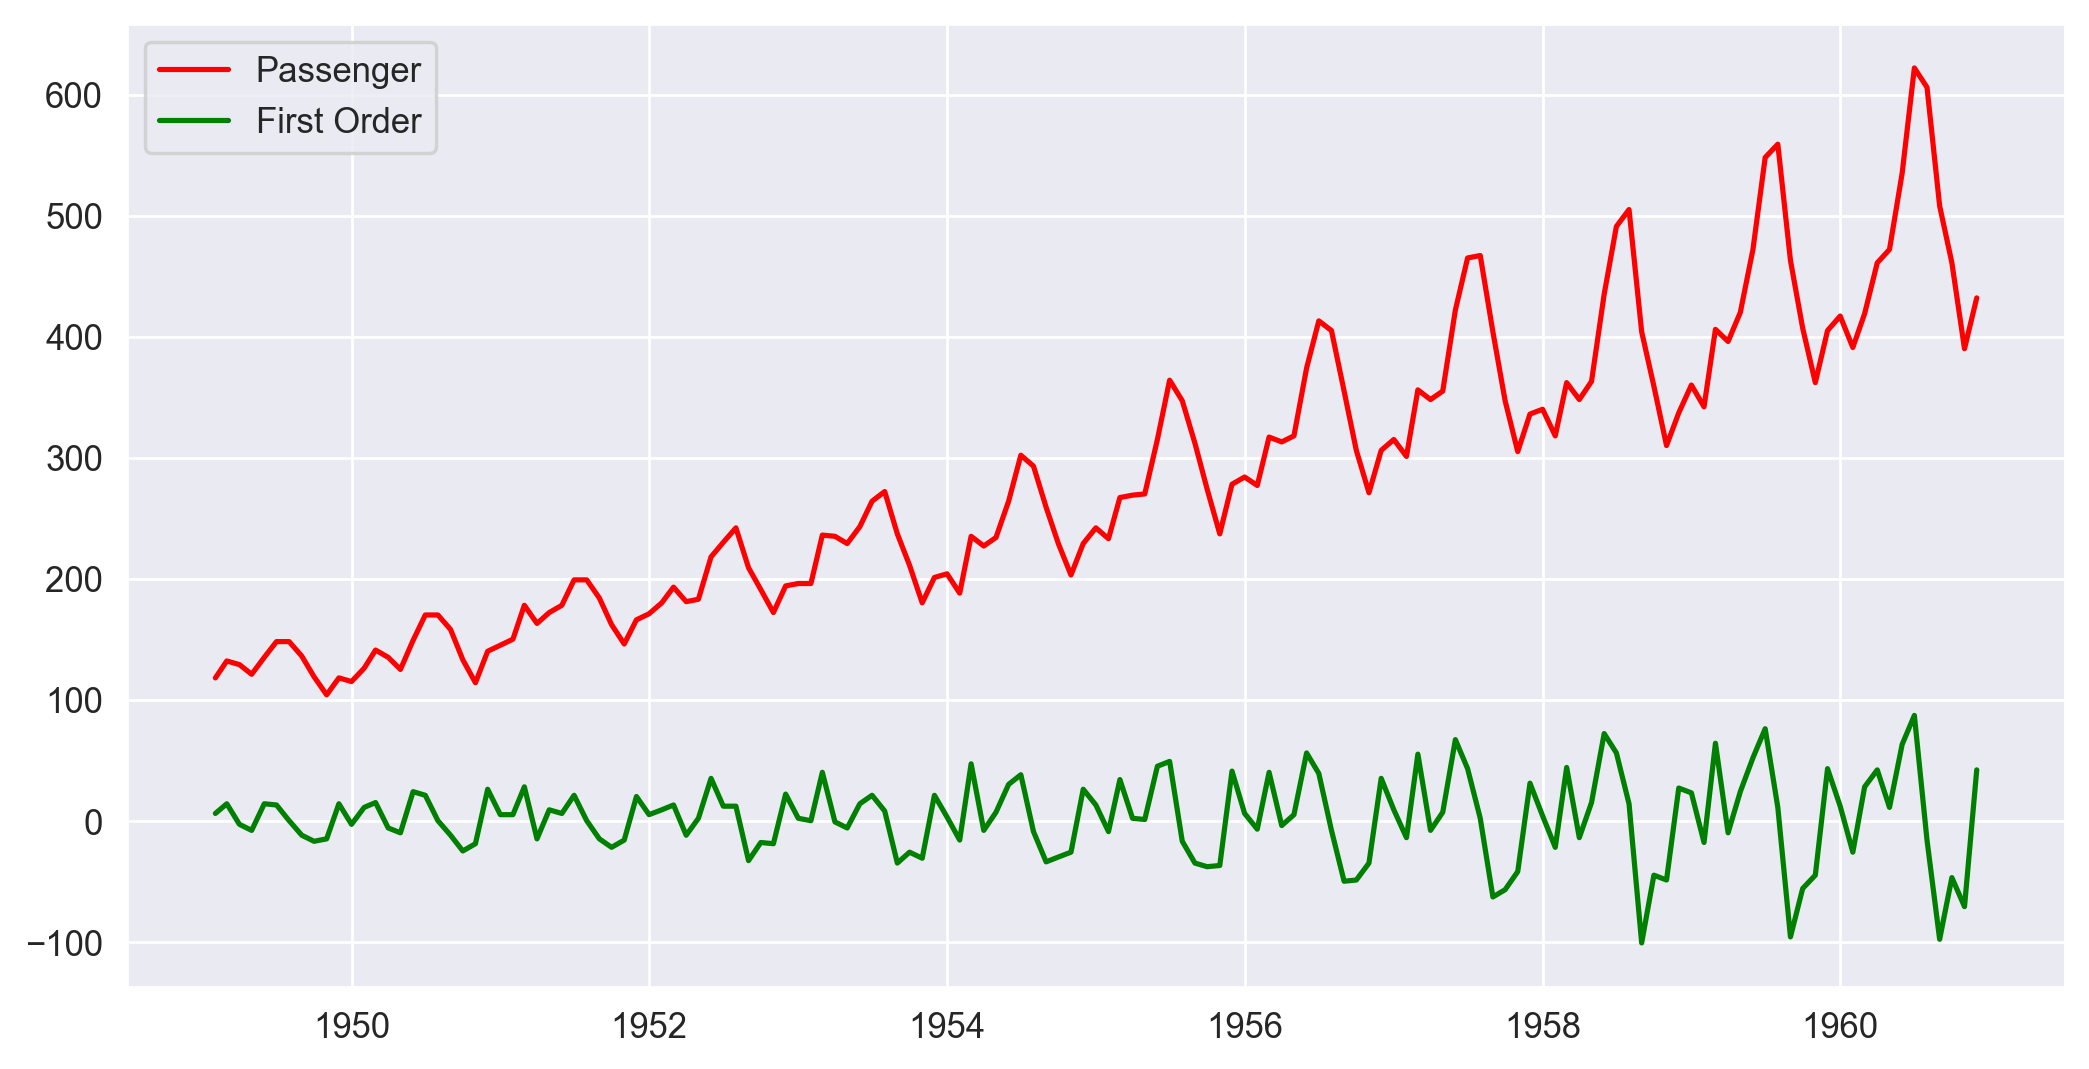

In [11]:
#plt
plt.plot(df['Passengers'], color = 'red', label = 'Passenger')
plt.plot(df['First-Order'], color = 'green', label = 'First Order')
plt.legend()

In [12]:
#calculate Autocorrelation
acf_values = acf(df['First-Order'])
acf_values

array([ 1.        ,  0.30285526, -0.10214755, -0.24127349, -0.30040158,
       -0.09407271, -0.07844257, -0.0923622 , -0.29480158, -0.19177821,
       -0.10491707,  0.28293105,  0.82917786,  0.28450079, -0.10575172,
       -0.22213093, -0.23107603, -0.06227904, -0.06618505, -0.09039973,
       -0.29710958, -0.16273198])

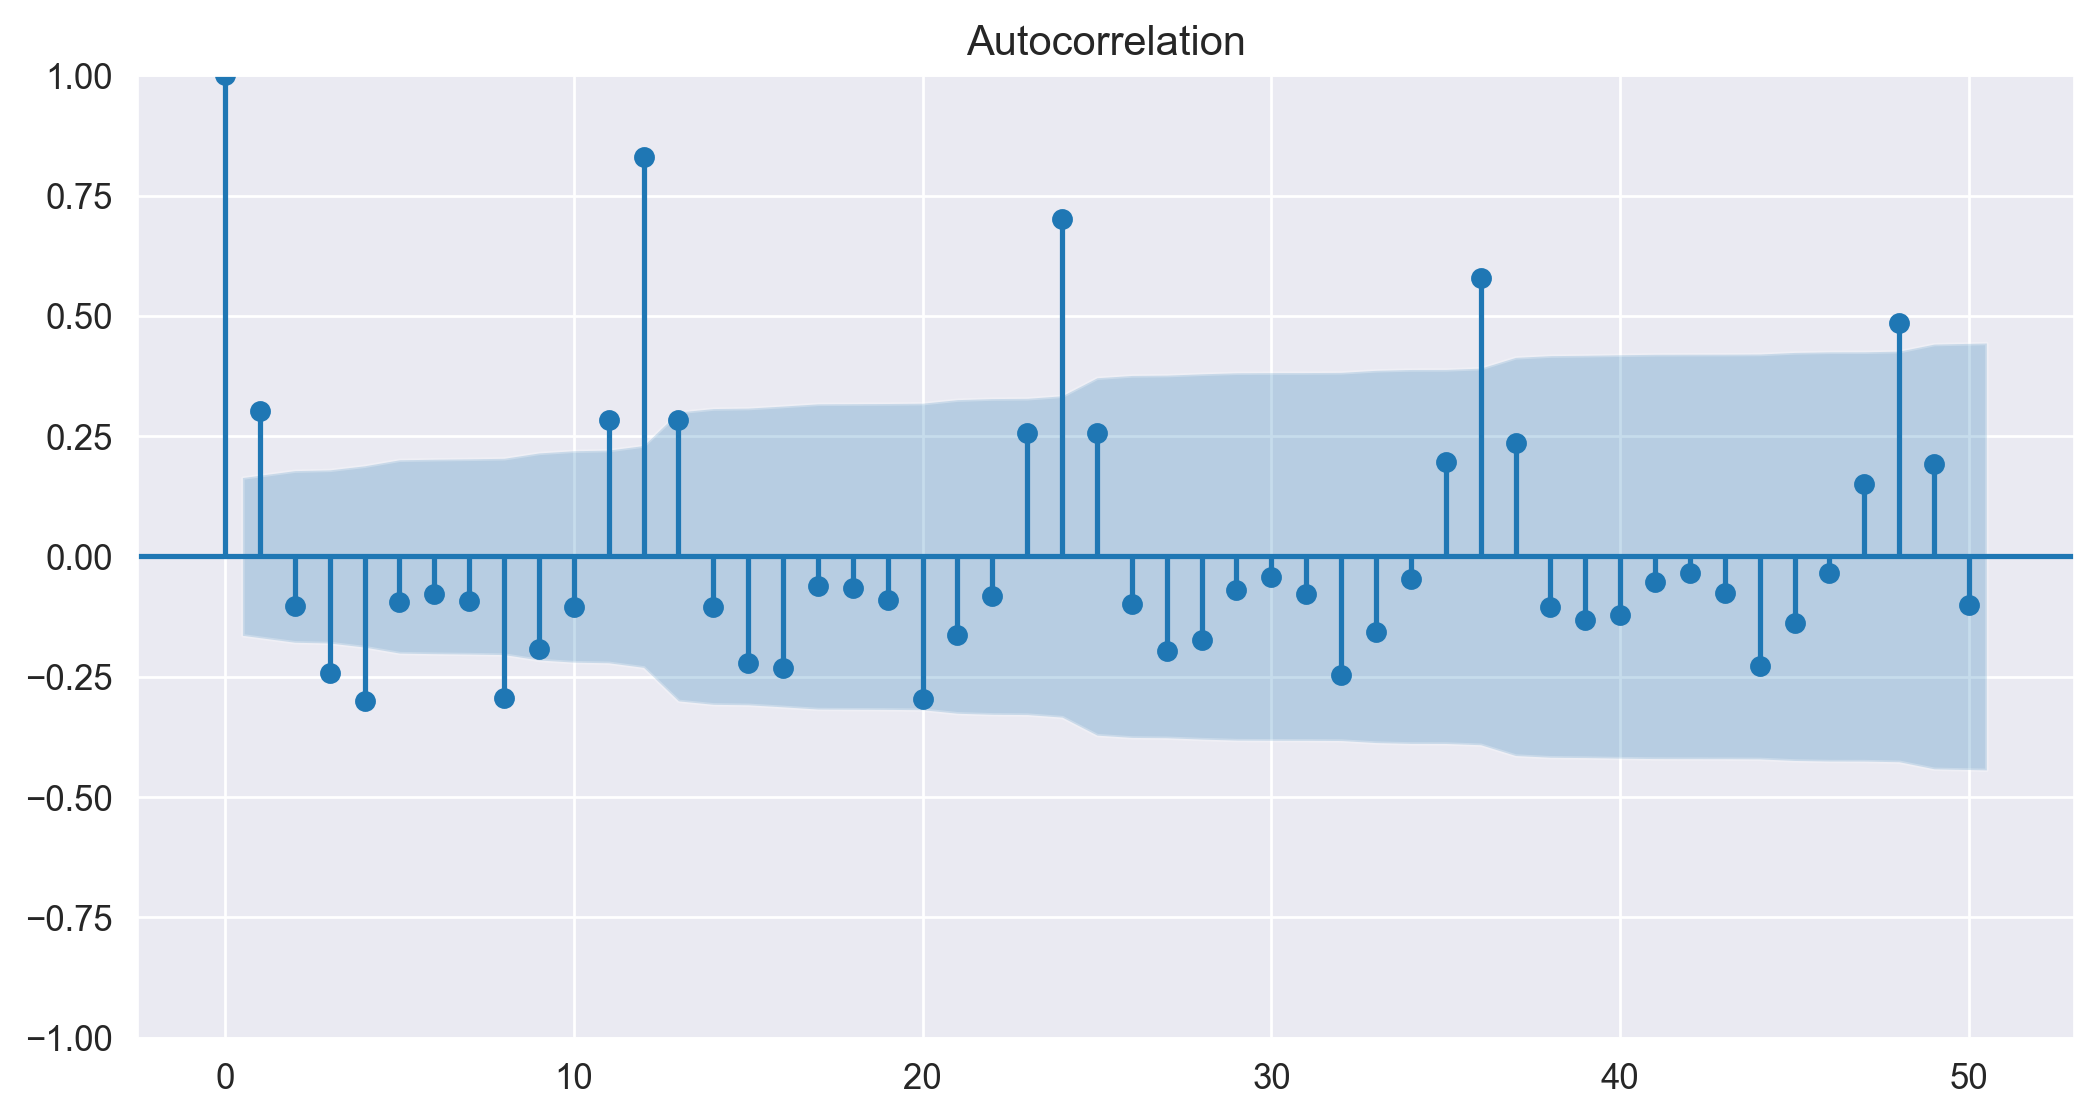

In [13]:
#plot ACF
plot_acf(df['First-Order'], lags=50);

# Partial Autocorrelation Function

In [14]:
# Calculate PACF
pacf_val = pacf(df['First-Order'])
pacf_val

array([ 1.        ,  0.30498804, -0.21677838, -0.16414895, -0.22880726,
        0.0102048 , -0.20039114, -0.16381118, -0.4908729 , -0.27906007,
       -0.67292181, -0.41858338,  0.60762779, -0.05342571, -0.30073394,
        0.02024145,  0.13861772,  0.09074817, -0.12191529,  0.01046262,
       -0.21763101, -0.12181244])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


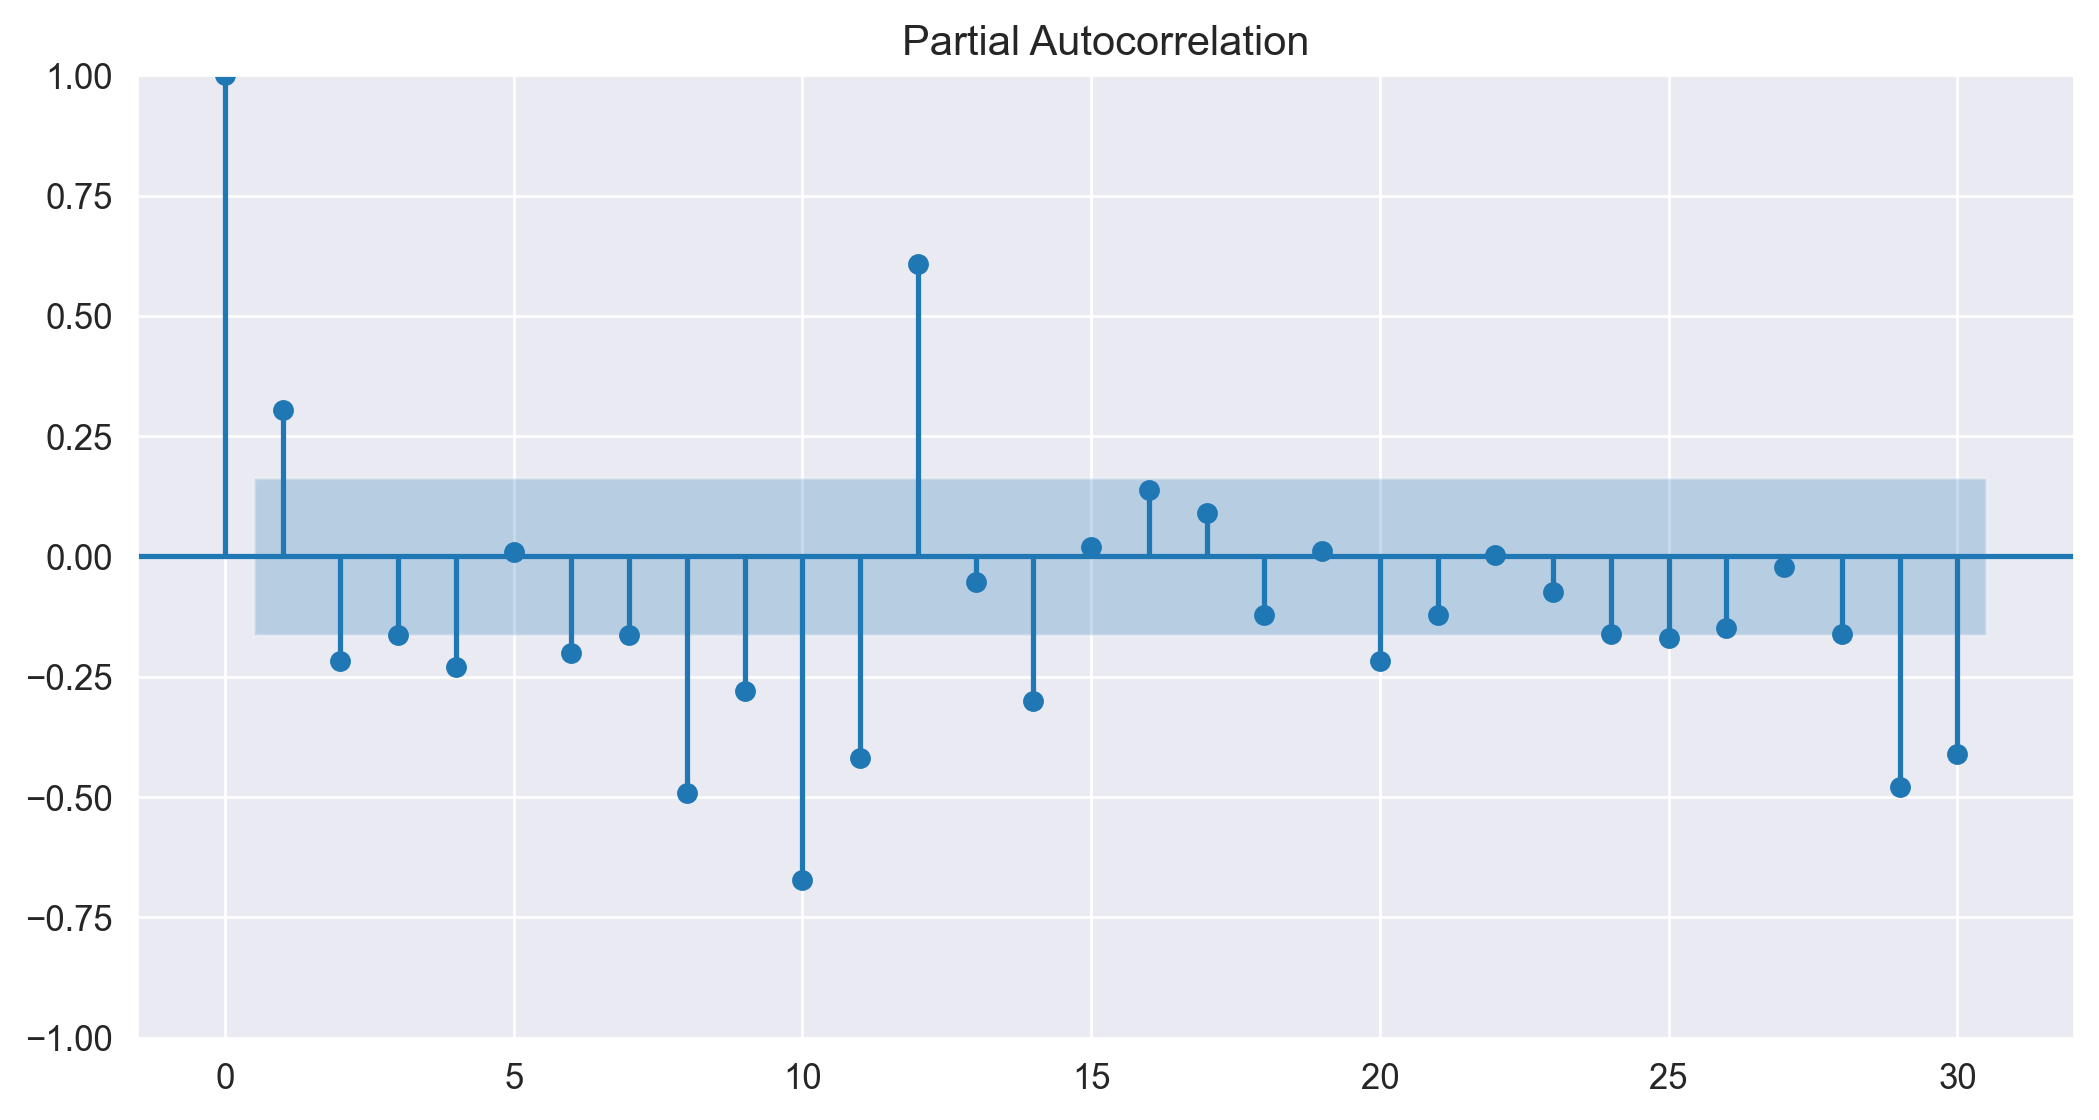

In [15]:
# plot PACF
plot_pacf(df['First-Order'], lags=30);

# Model Basel Method

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

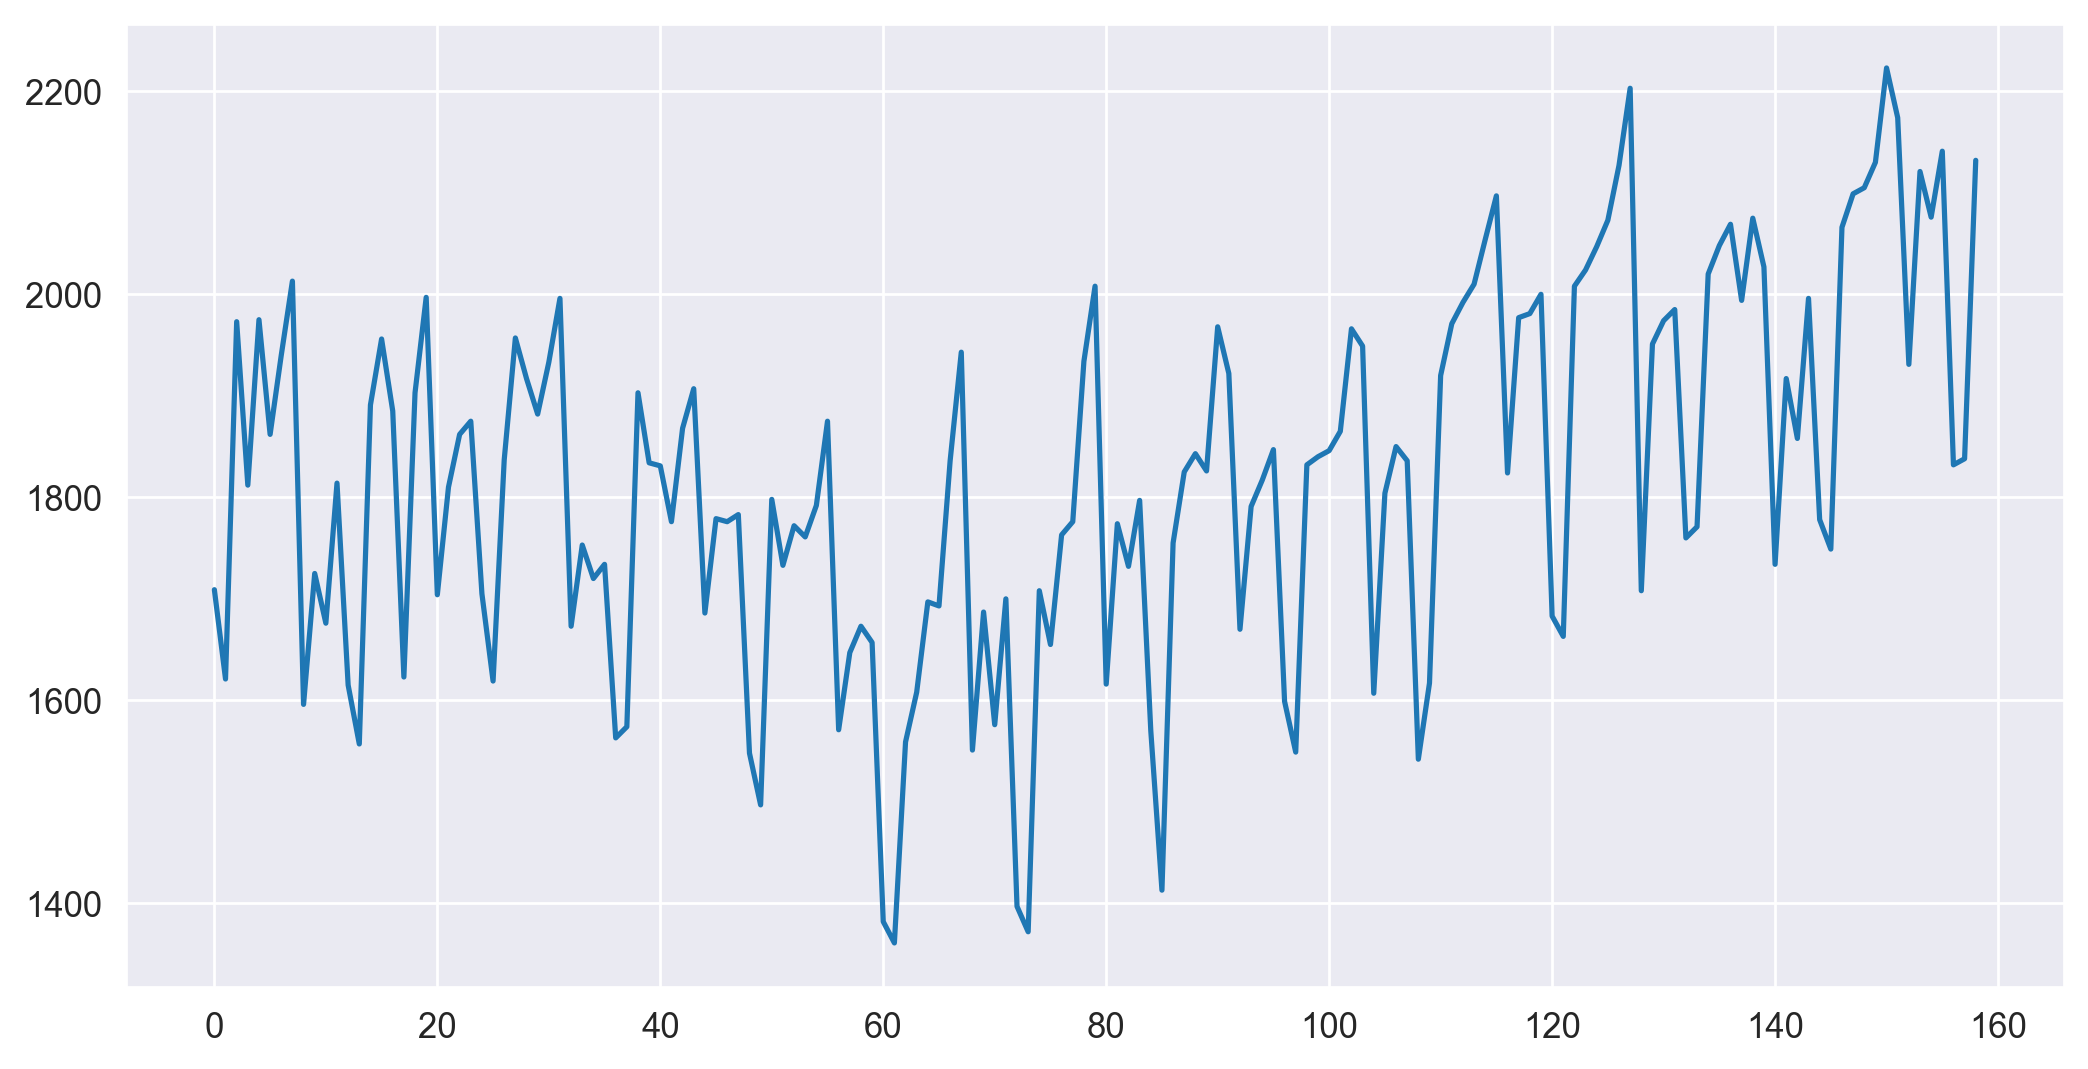

In [17]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()
# Walmart

In [18]:
Walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [19]:
Walmart.shape

(159, 17)

In [20]:
Walmart["Date"] = pd.to_datetime(Walmart.Month,format="%b-%y")

Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01


In [21]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

Walmart["month"] = Walmart.Date.dt.strftime("%b") # month extraction
Walmart["year"] = Walmart.Date.dt.strftime("%Y") # year extraction

In [22]:
Walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991


<AxesSubplot:xlabel='year', ylabel='Footfalls'>

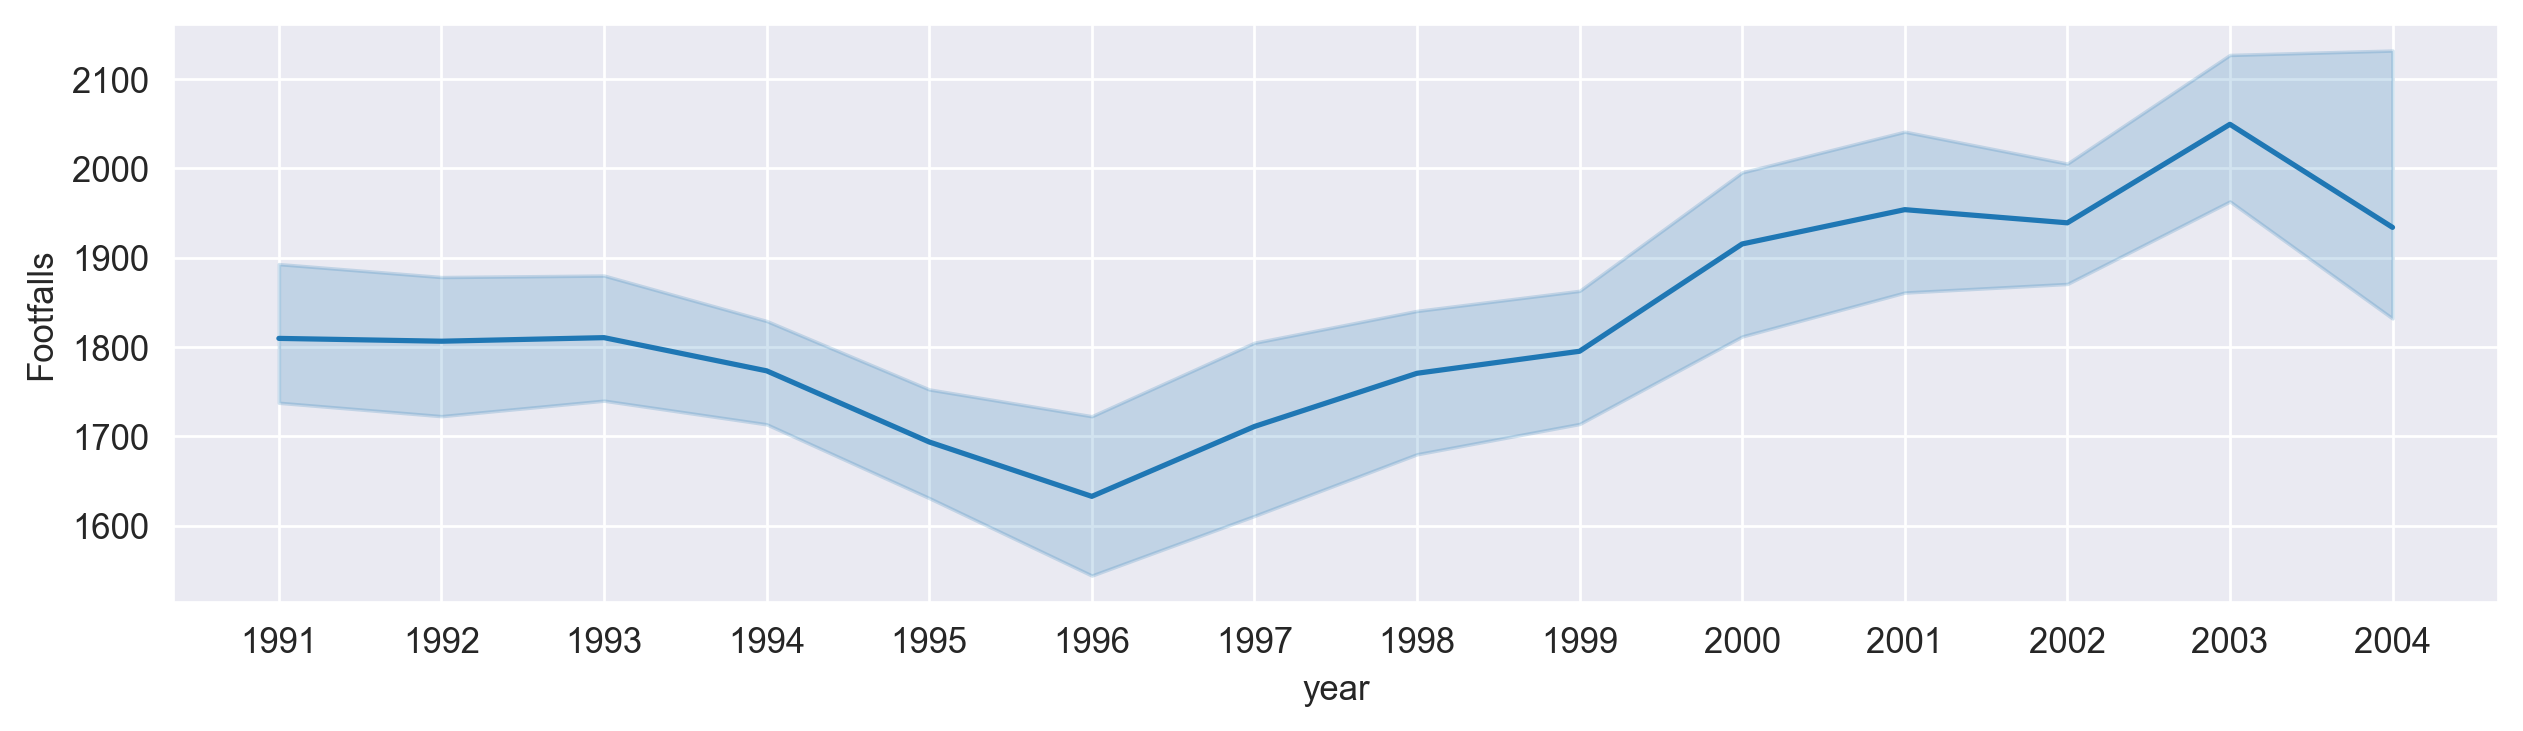

In [23]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Footfalls",data=Walmart)

# Splitting

In [24]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

In [25]:
Test

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
147,Apr-03,2099,148,7.649216,21904,0,0,0,1,0,0,0,0,0,0,0,0,2003-04-01,Apr,2003
148,May-03,2105,149,7.652071,22201,0,0,0,0,1,0,0,0,0,0,0,0,2003-05-01,May,2003
149,Jun-03,2130,150,7.663877,22500,0,0,0,0,0,1,0,0,0,0,0,0,2003-06-01,Jun,2003
150,Jul-03,2223,151,7.706613,22801,0,0,0,0,0,0,1,0,0,0,0,0,2003-07-01,Jul,2003
151,Aug-03,2174,152,7.684324,23104,0,0,0,0,0,0,0,1,0,0,0,0,2003-08-01,Aug,2003
152,Sep-03,1931,153,7.565793,23409,0,0,0,0,0,0,0,0,1,0,0,0,2003-09-01,Sep,2003
153,Oct-03,2121,154,7.659643,23716,0,0,0,0,0,0,0,0,0,1,0,0,2003-10-01,Oct,2003
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,2004


In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Footfalls~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(mean_squared_error(Test['Footfalls'], pred_linear))
rmse_linear

209.92559265462594

In [28]:
#Exponential

Exp = smf.ols('log_footfalls~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['Footfalls'], pred_Exp))
rmse_Exp

2062.9501154673767

In [29]:
#Quadratic 

Quad = smf.ols('Footfalls~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(mean_squared_error(Test['Footfalls'],pred_Quad))
rmse_Quad

137.1546274135642

In [30]:
#Additive seasonality 

add_sea = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(mean_squared_error(Test['Footfalls'], pred_add_sea))
rmse_add_sea

264.6643900568774

In [31]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Footfalls'], pred_add_sea_quad))
rmse_add_sea_quad

50.60724584169238

In [32]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(mean_squared_error(Test['Footfalls'], pred_Mult_sea))
rmse_Mult_sea

2062.996088663915

In [33]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(Test['Footfalls'], pred_Mult_add_sea))
rmse_Mult_add_sea 

2062.9434993334844

In [34]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,50.607246
2,rmse_Quad,137.154627
0,rmse_linear,209.925593
3,rmse_add_sea,264.664390
6,rmse_Mult_add_sea,2062.943499
1,rmse_Exp,2062.950115
5,rmse_Mult_sea,2062.996089
